In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test['Survived']=0
#combined_train_test=train.append(test)
combined_train_test=pd.concat([train,test])

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [20]:
combined_train_test.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


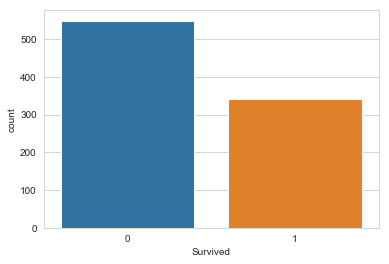

In [7]:
sns.countplot(x='Survived',data=train)

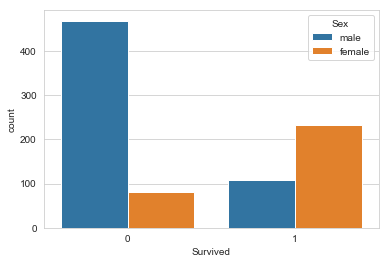

In [8]:
sns.countplot(x='Survived',hue='Sex',data=train)

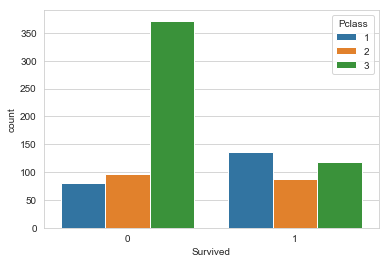

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=train)

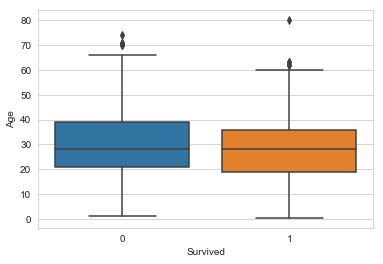

In [10]:
sns.boxplot(x='Survived',y="Age", data=train)

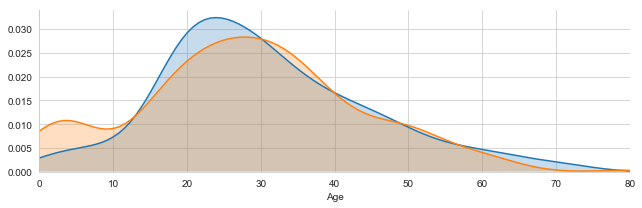

In [11]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/beingcshen/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


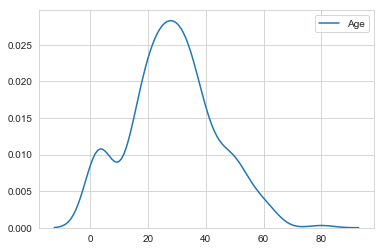

In [12]:
sns.kdeplot(train[train.Survived==1]['Age'])

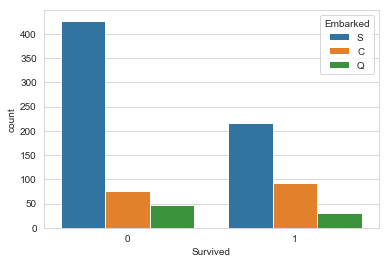

In [13]:
sns.countplot(x='Survived', hue='Embarked', data=train)

# Embarked fill by mode

In [26]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)

In [27]:
dummies_df = pd.get_dummies(combined_train_test['Embarked'], prefix='Embarked')
combined_train_test = pd.concat([combined_train_test, dummies_df], axis=1)

In [28]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,0,0,1


# Gender

In [29]:
dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, dummies_df], axis = 1)

In [30]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,0,1,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,0,1,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,0,0,1,1,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,0,0,1,0,1


# Name

In [42]:
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

In [47]:
combined_train_test.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title,Name_length
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,0,1,0,1,0,23
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,0,1,0,1,51
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,0,0,1,1,0,2,22
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,0,0,1,1,0,1,44
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,0,0,1,0,1,0,24


In [44]:
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]

In [46]:
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

# Fare

In [48]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [49]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [51]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)


In [52]:
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

# Pclass

In [54]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

In [55]:
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title,Name_length,Fare_bin,Fare_bin_id
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,0,male,1,...,A/5 21171,0,0,1,0,1,0,23,"(7.229, 7.896]",0
1,38.0,C85,C,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,PC 17599,1,0,0,1,0,1,51,"(26.277, 128.082]",1
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,0,female,0,...,STON/O2. 3101282,0,0,1,1,0,2,22,"(7.896, 10.5]",2
3,35.0,C123,S,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,113803,0,0,1,1,0,1,44,"(26.277, 128.082]",1
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,0,male,0,...,373450,0,0,1,0,1,0,24,"(7.896, 10.5]",2
5,NaN,NaN,Q,8.458300,"Moran, Mr. James",0,6,0,male,0,...,330877,0,1,0,0,1,0,16,"(7.896, 10.5]",2
6,54.0,E46,S,25.931250,"McCarthy, Mr. Timothy J",0,7,1,male,0,...,17463,0,0,1,0,1,0,23,"(10.5, 26.277]",3
7,2.0,NaN,S,4.215000,"Palsson, Master. Gosta Leonard",1,8,0,male,3,...,349909,0,0,1,0,1,3,30,"(-0.001, 7.229]",4
8,27.0,NaN,S,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,0,female,0,...,347742,0,0,1,1,0,1,49,"(-0.001, 7.229]",4
9,14.0,NaN,C,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,...,237736,1,0,0,1,0,1,35,"(10.5, 26.277]",3


# Sib Par

In [56]:
combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1

In [57]:
combined_train_test[['Age','Title', 'Parch', 'SibSp', 'Pclass']].describe()

,Age,Title,Parch,SibSp,Pclass
count,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,0.910619,0.385027,0.498854,0.669977
std,14.413493,1.680647,0.865560,1.041658,0.803009
min,0.170000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,2.000000,0.000000,1.000000,1.000000
max,80.000000,17.000000,9.000000,8.000000,2.000000


# Age

In [59]:
from sklearn.ensemble import RandomForestRegressor

#choose training data to predict age
age_df = combined_train_test[['Age','Title', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(combined_train_test['Age'].notnull())]
age_df_isnull = age_df.loc[(combined_train_test['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

In [60]:
age_df_isnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 5 to 417
Data columns (total 5 columns):
Age       0 non-null float64
Title     263 non-null int64
Parch     263 non-null int64
SibSp     263 non-null int64
Pclass    263 non-null int64
dtypes: float64(1), int64(4)
memory usage: 12.3 KB


In [61]:
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=40)
RFR.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
predictAges = RFR.predict(age_df_isnull.values[:,1:])
combined_train_test.loc[combined_train_test['Age'].isnull(), ['Age']]= predictAges

In [63]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

# Cabin

In [64]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

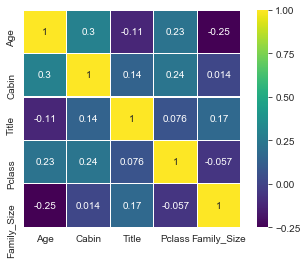

In [65]:
corr = combined_train_test[['Age','Cabin','Embarked','Title','Pclass','Family_Size']].corr()
colormap = plt.cm.viridis
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

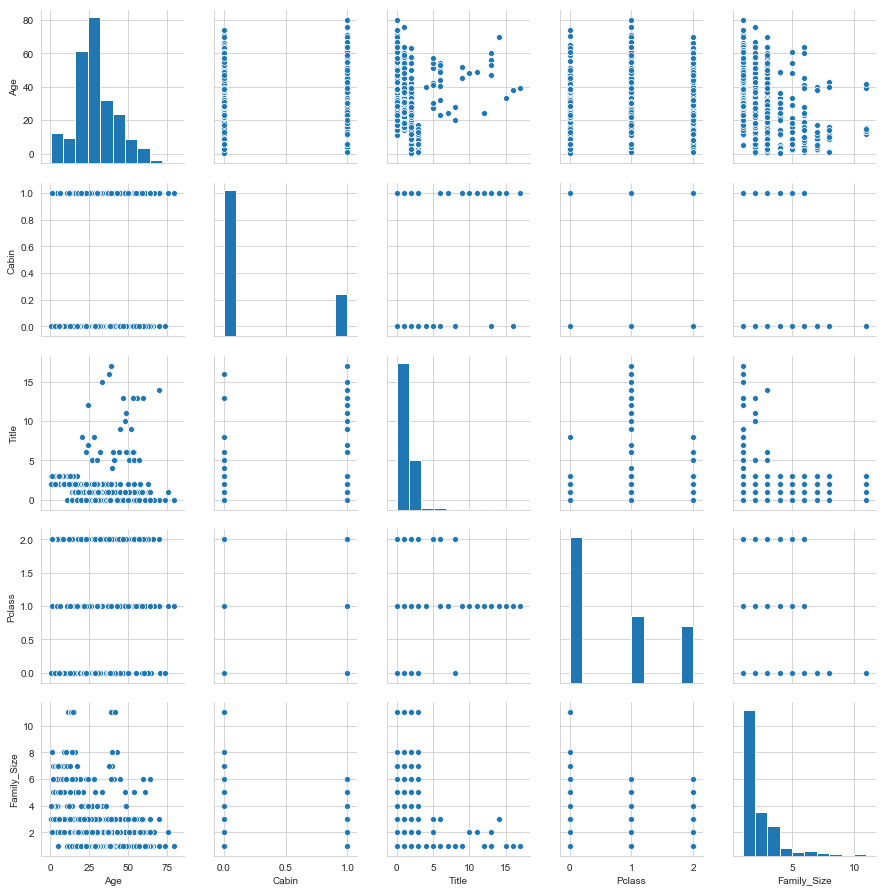

In [66]:
sns.pairplot(combined_train_test[['Age','Cabin','Embarked','Title','Pclass','Family_Size']], palette = 'seismic')

# Normalization

In [67]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare', 'Name_length','Family_Size','Fare_bin_id','Ticket_Letter']])

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [68]:
combined_train_test.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Title',
       'Name_length', 'Fare_bin', 'Fare_bin_id', 'Family_Size',
       'Ticket_Letter'],
      dtype='object')

In [69]:
combined_train_test[['Age','Fare', 'Name_length','Family_Size','Fare_bin_id','Ticket_Letter']] = scale.transform(combined_train_test[['Age','Fare', 'Name_length','Family_Size','Fare_bin_id','Ticket_Letter']])

/Users/beingcshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [70]:
combined_data_backup = combined_train_test
combined_train_test.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Title', 
                       'Parch', 'SibSp', 'Fare_bin', 'Ticket'],axis=1,inplace=True)

In [71]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [72]:
titanic_train_data_X.head()

,Age,Cabin,Fare,Pclass,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Name_length,Fare_bin_id,Family_Size,Ticket_Letter
0,-0.566342,0,-0.554177,0,0,0,1,0,1,-0.434672,-1.374977,0.073352,-0.712692
1,0.622440,1,1.541869,1,1,0,0,1,0,2.511806,-0.678712,0.073352,-0.589713
2,-0.269146,0,-0.504344,0,0,0,1,1,0,-0.539904,0.017553,-0.558346,-0.466735
3,0.399544,1,0.870667,1,0,0,1,1,0,1.775186,-0.678712,0.073352,-0.343757
4,0.399544,0,-0.495116,0,0,0,1,0,1,-0.329441,0.017553,-0.558346,-0.343757


In [73]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(titanic_train_data_X, titanic_train_data_Y)
Y_pred = svc.predict(titanic_test_data_X)
acc_svc = round(svc.score(titanic_train_data_X, titanic_train_data_Y) * 100, 2)


/Users/beingcshen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
acc_svc

83.16

In [71]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)